### Gather tools and data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from scipy import stats 
import numpy as np
from sklearn.linear_model import LinearRegression
import pingouin as pg
from pingouin import pairwise_ttests

In [2]:
# Read in CSV file
data = pd.read_csv("opiod-analysis/Resources/Health04/Health04_S.csv")
df1 = pd.DataFrame(data)

In [3]:
regions = "state_region.txt"
region_data = pd.read_csv(regions)
region_df = pd.DataFrame(region_data).loc[:,['State Code', 'Region', 'Division']].rename(columns={'State Code' : 'st_abb', 'Region' : 'REGION', 'Division' : 'DIVISION'})

In [4]:
df = pd.merge(region_df, df1, on="st_abb", how="inner")

### make variable of regions 

In [5]:
WEST = df[df["REGION"] == 'West']['opPrscRt19']
SOUTH = df[df["REGION"] == 'South']['opPrscRt19']
NORTHEAST = df[df["REGION"] == 'Northeast']['opPrscRt19']
MIDWEST = df[df["REGION"] == 'Midwest']['opPrscRt19']
df.describe()

,STATEFP,opPrscRt19,prMisuse19,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRt19,odMortRtAv
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,28.960784,49.531373,3.659020,16.164706,17.739216,20.837255,22.498039,22.039216,23.139216,20.402353
std,15.832828,13.052961,0.371011,5.667445,6.921014,9.321930,10.674708,10.025389,10.184009,7.617755
min,1.000000,30.300000,2.840000,6.300000,6.900000,6.400000,8.100000,6.900000,8.700000,9.750000
25%,16.500000,40.400000,3.400000,12.150000,13.150000,13.650000,14.100000,13.750000,14.650000,15.200000
50%,29.000000,45.400000,3.680000,15.200000,16.000000,19.300000,21.200000,21.200000,21.100000,18.570000
75%,41.500000,57.950000,3.880000,19.200000,21.050000,24.450000,28.600000,27.700000,30.050000,23.360000
max,56.000000,85.800000,4.560000,35.500000,41.500000,52.000000,57.800000,51.500000,52.800000,48.520000


### Plot box plot base d

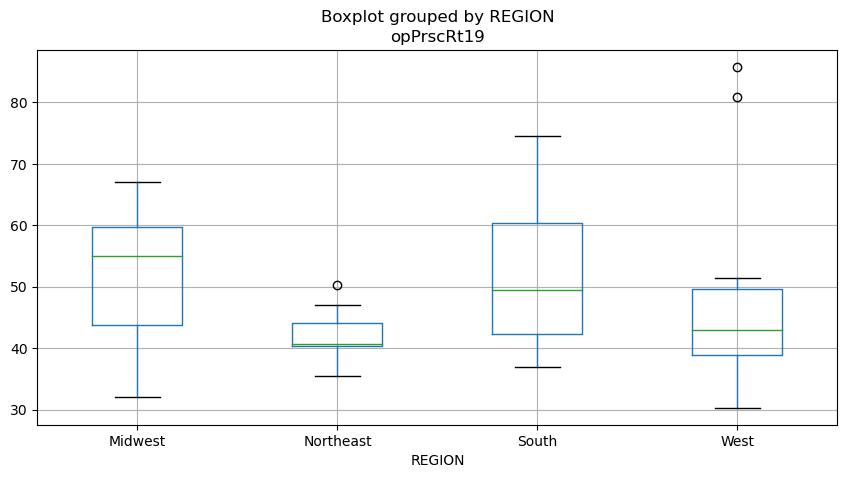

In [6]:
#df.odMortRtAv.plot.box(by='REGION', figsize=(15,10))
df.boxplot('opPrscRt19', by='REGION', figsize=(10,5))
plt.savefig('df.png')

### Based on the analysis Northeast and Midwest have the strongest P-Values

In [7]:
# Perform ANOVA
result = stats.f_oneway(WEST, SOUTH, NORTHEAST, MIDWEST)


pairwise_gameshowell = pg.pairwise_gameshowell(data=df, dv="opPrscRt19", between="REGION").sort_values(['pval'], ascending = True).set_index('A')
pairwise_gameshowell 

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
Northeast,South,42.200000,52.788235,-10.588235,3.496532,-3.028211,21.917218,0.029276,-0.938382
Midwest,Northeast,51.941667,42.200000,9.741667,3.576804,2.723567,15.334680,0.066362,1.035141
Northeast,West,42.200000,48.123077,-5.923077,4.978805,-1.189658,14.353401,0.642652,-0.420420
South,West,52.788235,48.123077,4.665158,5.693594,0.819370,21.753015,0.844678,0.304824
Midwest,West,51.941667,48.123077,3.818590,5.743240,0.664884,20.857799,0.909064,0.253155
Midwest,South,51.941667,52.788235,-0.846569,4.519075,-0.187332,25.788584,0.997606,-0.066891


In [8]:
df.groupby('REGION')['opPrscRt19'].describe()

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,12.0,51.941667,11.222255,32.1,43.7,55.05,59.65,67.0
Northeast,9.0,42.200000,4.548351,35.4,40.3,40.70,44.10,50.3
South,17.0,52.788235,12.990808,36.9,42.3,49.40,60.40,74.6
West,13.0,48.123077,17.098789,30.3,38.8,43.00,49.70,85.8
